# Lab 3: Supervised learning

Hello! This lab has an objective to teach how to run simple classification models, mainly using the scikit-learn library. In this lab, you will learn how to build the models on a given training set and then apply them for predicting the values on a test set. Here in this lab we will also show you how to derive accuracy, one of the most famous performance measures, on the test set.

- 3-1. Run several algorithms using scikit-learn
  - Perceptron
  - K-nearest neighbors
  - Decision tree
  - Support vector machines

- 3-2. Implement manually (for programmers)
  - Perceptron
  - K-nearest neighbors

## 3-1. Run several algorithms using scikit-learn 

We may already know a basic concept of scikit-learn as we learn about it from the previous labs. We keep using it, but now our task is **supervised learning**, which means we start to deal with the labeled dataset!

To use scikit-learn, we do not need to define python-style functions or classes; rather, we load and call the library methods directly.
In this lab, we will use **Connectionist Bench** from UCI Machine Learning Repository, which can be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data). We already located the dataset into **datasets** directory, so you can simply include it from there. This dataset has two classes: ***Mines***, ***Rocks*** with 60 attributes representing each data entity. More information can be found [here](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)). If you succeed in downloading, place the file in the same directory with this jupyter lab file, and let's get started!

#### Load the libraries

Basic libraries used throughout the lab session!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 12345

#### Load the data

The first thing you always need to do is loading data and check it correctly loaded. We will use pandas to load and manipulate it. Since there is no proper **head** for the table, you need to choose not to use the first row as a set of column names. The dataset is located in the **datasets** directory and its name is **sonar.all-data**.

In [2]:
#data = pd.read_csv("datasets/sonar.all-data")
data = pd.read_csv("datasets/sonar.all-data", header = None)

You can always check whether the shape of data by looking at first few rows.

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


You can also check the null values. You can use .info() function that you learned from the previous labs.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

There is also isnull() function to check nulls in the dataframe.

In [5]:
data.isnull().sum().sum()

0

We will use scikit-learn, in which case we usually manage labels and data attributes separately. Let's separate the data labels from the dataset.

In [6]:
X = data.drop(60, axis=1)

In [7]:
y = data.iloc[:, -1]

Next, it might be better to split the training set and the test set now. In this lab, we will not apply any advanced validation strategy, such as k-fold cross-validation, so it will be enough just to split the whole dataset into two sets.

To do this, we can use the **train_test_split** function in scikit_learn. You can find it in the model_selection package.

In [8]:
from sklearn.model_selection import train_test_split

This method divides the entire data into a training set and a test set. To do this, we need to enter some parameters. Overall, we need to put what percentage our test set will have, whether we want to allow shuffling, random state, and whether we want to keep the label's proportions when we divide the data.

In this lab, we will divide the training and test sets with a 70:30 ratio.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y)

#### Perceptron

The first algorithm we are going to make is **Perceptron**! Perceptron is a binary classifier having one weight and one bias value $w∙x+b$. You can also regard it as a single neuron classifier.

Scikit-learn has this single neuron perceptron as its built-in function. We can try it out!

**Perceptron** is in the linear_model package of scikit_learn.

In [10]:
from sklearn.linear_model import Perceptron

To perform analysis, we first need to make an instance by calling a class **Perceptron**. It receives few options, which can be found <a herf="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html">here</a>. Since we are trying a basic perceptron we learned from the lecture, we do not need to put all the parameters they support. We will not use any regularization or early-stopping here, but there are still some parameters we need to care.

- max_iter: Perceptron can converge or cannot converge; it depends on the dataset. So we can at least set some reasonable maximum iteration.
- fit_intercept: Perceptron can have intercept (or bias) value or not. You can state it here (True/False).
- tol: Since it is also possible that Perceptron is not converged forever, we can state a stopping criterion. The iteration will stop when loss > previous_loss - tol.
- shuffle: We can shuffle the training data with each iteration.

We firstly create our instance with maximum iteration 100 and without shuffle and tol values.

In [11]:
ppn = Perceptron(max_iter=100, tol=None, shuffle = False)

We already prepared training data, so we can call **fit** function with our dataset and label.

In [12]:
ppn.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=100, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=False, tol=None,
           validation_fraction=0.1, verbose=0, warm_start=False)

Now our instance has trained weight and bias. We can get *test error* with our test set by calling **score** function, and we can see predicted labels by calling **predict** function.

In [13]:
ppn.score(X_test, y_test)

0.6825396825396826

In [14]:
ppn.predict(X_test)

array(['R', 'R', 'M', 'R', 'M', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M',
       'M', 'R', 'M', 'R', 'R', 'R', 'R', 'R', 'M', 'R', 'M', 'M', 'R',
       'R', 'M', 'R', 'M', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'R', 'M',
       'M', 'R', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'R', 'R', 'M',
       'R', 'R', 'R', 'R', 'M', 'M', 'R', 'R', 'R', 'R', 'M'], dtype='<U1')

If we set the **tol** parameter, the algorithm might finish earlier than our maximum iteration. We can also check it as it is stored in *n_iter_* variable in our instance.

In [15]:
ppn.n_iter_

100

#### K-nearest neighbors

The following algorithm we will try is k-nearest neighbors or kNN. If we use scikit-learn again, all the methods we call will be the same. The only change we need to remember is when we create an instance because there will be different parameters. We can find kNN in the neighbors package.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

kNN is a simple algorithm having a small number of parameters. Detailed information can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). However, we will focus on the number of neighbors now as it is the critical factor of the performance. We can experiment by changing the number of neighbors. If needed, you can even change the distance function from euclidean to something else (p), and also, you can put more weight on the closest neighbor if the case is the numerical prediction (weights). 

In [17]:
neigh = KNeighborsClassifier(n_neighbors=3)

After making the instance, we can train and test our algorithm in the same way as Perceptron. We can use **fit** for training, **score** for getting the test accuracy, and **predict** for predicting the labels of the test dataset.

In [18]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [19]:
neigh.score(X_test, y_test)

0.8253968253968254

In [20]:
neigh.predict(X_test)

array(['R', 'R', 'M', 'M', 'M', 'M', 'R', 'R', 'R', 'M', 'M', 'M', 'M',
       'R', 'R', 'M', 'M', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'M',
       'R', 'R', 'M', 'M', 'M', 'M', 'R', 'M', 'M', 'M', 'R', 'R', 'M',
       'M', 'R', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'M', 'R', 'M',
       'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'R'],
      dtype=object)

#### Decision tree

Let's deal with the **decision tree** this time. When running a decision tree using scikit-learn, the process after creating an instance is the same as other classifiers. So, the most important thing to worry about is understanding and using the parameters used to create a new instance. You can find a normal decision tree in the **tree** package.

In [21]:
from sklearn.tree import DecisionTreeClassifier

Here we do not need to put any parameter as DecisionTreeClassifier has default options. Parameters are used to constraint the tree by limiting the maximum depth or minimum samples to split. There is no very optimal case that can be applied to all cases, so we may need to optimize it by running further optimization techniques such as *grid search*, which we will look into in the next lab. Here we are going to use the very normal decision tree without any parameter.

In [22]:
dtc = DecisionTreeClassifier(random_state = RANDOM_SEED)

After making the instance, we can train and test our algorithm in the same way as Perceptron. We can use **fit** for training, **score** for getting the test accuracy, and **predict** for predicting the labels of the test dataset.

In [23]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

In [24]:
dtc.score(X_test, y_test)

0.746031746031746

In [25]:
dtc.predict(X_test)

array(['R', 'R', 'R', 'M', 'M', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M',
       'R', 'R', 'M', 'R', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'R',
       'M', 'M', 'M', 'M', 'R', 'R', 'R', 'M', 'R', 'M', 'M', 'R', 'M',
       'R', 'R', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'M', 'R', 'R', 'M',
       'M', 'R', 'R', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'M'],
      dtype=object)

#### Support vector machines

Scikit-learn offers a variety of support vector machine algorithms: SVC, NuSVC, and LinearSVC. SVC is the most basic form of support vector machine supporting various kernels, but LinearSVC forms a linear boundary without a kernel (You can find more [here](https://scikit-learn.org/stable/modules/svm.html)). NuSVC is similar to SVC, but the biggest feature is that we can adjust the number of support vectors. In this lab, we will use SVC, the most basic form of SVM. These three classifiers are available in the **SVM** package.

In [26]:
from sklearn.svm import SVC

**SVC** has a lot of parameters, similar to the decision tree we saw earlier. Many parameters are used to fine-tune the SVM. The most important parameter here is C, the regularization factor. This value is an indicator of how much the training set of the SVM can cover. The larger the C, the smaller the margin area, which means that the training set's fitting ability becomes stronger than before. Therefore, it is important to find C parameters that can find the right level of regularization.

We can plot the iris dataset by differing C! We prepared the plot_iris function that is available on the scikit-learn user guide website. We can try various C values and see the difference!

Please import the function by running this block below!

In [27]:
from dami_dsv.supervised_learning.plot_iris import plot_iris

You can freely change the C value and see the differences.

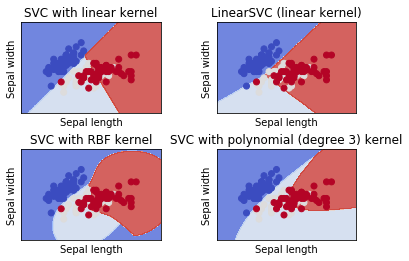

In [28]:
plot_iris(C=100.0)

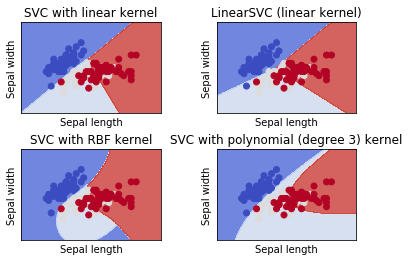

In [29]:
plot_iris(C=5.0)

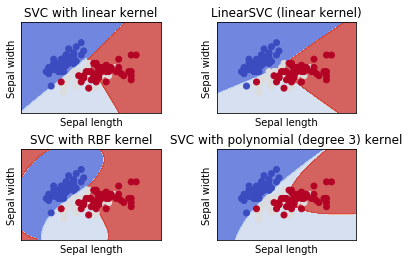

In [30]:
plot_iris(C=1.0)

Now we can apply SVM to our dataset. There are many available kernels, but in this lab, we will use the RBF kernel, which is set as a default in scikit-learn. We will have a chance to deal with other kernels in the upcoming assignment!

In [31]:
svc = SVC(gamma="scale")

In [32]:
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
svc.score(X_test, y_test)

0.7777777777777778

In [34]:
svc.predict(X_test)

array(['R', 'M', 'M', 'M', 'M', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M',
       'M', 'R', 'M', 'M', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'M',
       'R', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'M', 'M', 'R', 'M', 'M',
       'M', 'R', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'M', 'R', 'R',
       'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'R', 'M'],
      dtype=object)

We can even change C and see the difference in the test score.

In [35]:
svc = SVC(C = 5, gamma="scale")
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.8571428571428571

When we give too much space for the margin, SVM can be underfitted, and it loses classification power. Too much generalization cannot always be good.

In [36]:
svc = SVC(C = 0.1, gamma="scale")
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.5396825396825397

## 3-2. Implement manually

Now it is time to implement some algorithms we tried before manually! It will give you a more robust understanding of the algorithm. We are going to implement **perceptron** and **kNN**!

In those implementations, we used **class** notation and use **self** variable inside. This structure is made to give you the same experience with scikit-learn when testing. You only use **self** here when you want to call the methods defined in the class structure or want to access the class variable defined by self first. The class-based structure will not appear in the assignment.

#### Perceptron

Before implementing perceptron, we need to change the letter classes into numbers as perceptron assumes that it receives binary numeric classes. If you want to make a more sophisticated one, then you can receive classes as they are and make some mapping function that maps the letters into binary numbers. However, here we will change them as they are not that important in this round.

In [37]:
y_train_new = y_train.replace('M', 0).replace('R', 1)
y_test_new = y_test.replace('M', 0).replace('R', 1)

Here we already have a basic structure of our new perceptron classifier! It has the same structure with scikit-learn's one, so we can try in the same way after finishing the development.

In [38]:
class Perceptron():
    def __init__(self, max_iter):
        """
        A constructor that receives parameters and save them into member variables.
        You will receive max_iter value and need to save into self.max_iter.

        Input:
          max_iter: The maximum iteration of the algorithm.
        Output:
          None.
        """
        return
    
    def fit(self, X, y):
        """
        A method to train the model by receiving the training dataset and labels.

        - Step 1: The algorithm needs to set an empty list of size |attributes|+1.
                  The additional value is used for intercept value of the perceptron classifier.
        - Step 2: The algorithm iterates self.max_iter times and train the model.
        - Step 3: For each iteration, we traverse all rows in our dataset and predict the label of each row 
                  by calling self.predict method. If the label is different (prediction was wrong),
                  we calculate the error by substracting a predicted label from a true label.
        - Step 4: When prediction was wrong, we update the weights by adding [error*row] to the previous weights. 
                  For intercept value, we update it by simply adding the error to the previous value.
        - Step 5: Save the trained weights into self.w.

        Input:
          X: Training dataset.
          y: Training labels.

        Output:
          None.
        """
        return
                
    def predict(self, d1):
        """
        A method to predict a label with trained weights.

        - Step 1: We calculate the dot product of our weights (self.w) and the given row.
                  For the intercept value, we multiply this value by one since we do not have any value in the received row.
        - Step 2: If the dot product is bigger than or equal to zero, return 1. Otherwise, return 0.

        Input:
          row: A single row from dataset.
        Output:
          Binary integer (0 or 1).
        """
        return
    
    def score(self, X, y):
        """
        A method to calculate an accuracy score of a received dataset X and labels Y.

        - Step 1: Set the initial loss value to zero.
        - Step 2: We traverse all rows in our dataset and predict the label of each row
                  by calling self.predict method. If the label is different (prediction was wrong),
                  we add one to the loss value.
        - Step 3: Divide the loss value by a size of the dataset and substract it from one to get an accuracy score.
        - Step 4: Return the accuracy score.


        Input:
          X: Dataset that we want to calculate scores.
          y: True labels for the dataset X.

        Output:
          score: An accuracy with a range of [0, 1].

        """
        return


Here is the answer!

In [39]:
class Perceptron():
    def __init__(self, max_iter):
        self.max_iter = max_iter
        
    def fit(self, X, y):
        self.w = np.zeros(len(X.iloc[0])+1)
        for it in range(self.max_iter):
            loss = 0
            for idx, row in X.iterrows():
                prediction = self.predict(row)
                error = y[idx] - prediction
                loss += error
                self.w[0] = self.w[0] + error
                self.w[1:] = self.w[1:] + error * row
                
    def predict(self, row):
        act = self.w[0]
        act += self.w[1:].dot(row)
        if act >= 0:
            return 1
        else: return 0
    
    def score(self, X, y):
        loss = 0
        for idx, row in X.iterrows():
            prediction = self.predict(row)
            error = y[idx] - prediction
            loss += abs(error)
        return 1 - loss/len(y)

Now we are done with implementation! Then we can create the instance, train the model, and test it in the same way!

Run the codes below to check the result of the algorithm.

In [40]:
p = Perceptron(max_iter=100)

In [41]:
p.fit(X_train, y_train_new)

Now, let's check the score is the same as the one we got from scikit-learn that we already tried in the lab.

In [42]:
p.score(X_test, y_test_new)

0.6825396825396826

#### kNN

Now it is kNN's turn. To implement kNN easier, we may need **Counter**, one of the built-in data structures in Python collections. It is okay if you do not know it, but it makes your job much easier! If you want to know it, refer to Python's official document [here](https://docs.python.org/3/library/collections.html#counter-objects).

In [43]:
from collections import Counter

We will use the same structure again so that we can test in the same way!

In [44]:
class KNN:
    def __init__(self, n_neighbors):
        """
        A constructor that receives parameters and save them into member variables.
        You will receive n_neighbors value and need to save into self.n_neighbors.

        Input:
          n_neighbors: Number of neighbors to look when we predict.
        Output:
          None.
        """
        return
        
    def fit(self, X, y):
        """
        A method to train the model by receiving the training dataset and labels.

        - Step 1: Since we have no training process in KNN algorithm, we can just save the dataset and labels into
                  the member variables self.X, self.y.
                  
        Input:
          X: Training dataset.
          y: Training labels.

        Output:
          None.
        """
        return
    
    def euclidean_dist(self, d1, d2):
        """
        A method to calculate an euclidean distance between two data points d1 and d2.

        - Step 1: We calculate an euclidean distance, by substracting one point from the other, 
                  square it and take a squared root.
                  
        Input:
          d1, d2: Data points (rows) from the dataset.
          
        Output:
          distance: An euclidean distance value between d1 and d2.
        """
        return
        
    def predict(self, row):
        """
        A method to predict a label with trained weights.

        - Step 1: We iterate all training datasets and get [n_neighbors] nearest data points by calculating
                  euclidean distances from the input data point to all training datasets.
        - Step 2: We get the labels from self.y with the indices of [n_neighbors] nearest data points from self.X
                  and perform majority vote on [n_neighbors] nearest data points' labels. 
                  In this stage, you can use collections.Counter to make this task easier.
        - Step 3: Return the label that majority of the data points have.

        Input:
          row: A single row from dataset.
        Output:
          Binary integer (0 or 1).
        """
        return
    
    def score(self, X, y):
        """
        A method to calculate an accuracy score of a received dataset X and labels Y.

        - Step 1: Set the initial loss value to zero.
        - Step 2: We traverse all rows in our dataset and predict the label of each row 
                  by calling self.predict method. If the label is different (prediction was wrong),
                  we add one to the loss value.
        - Step 3: Divide the loss value by a size of the dataset and substract it from one to get an accuracy score.
        - Step 4: Return the accuracy score.


        Input:
          X: Dataset that we want to calculate scores
          y: True labels for the dataset X

        Output:
          score: An accuracy with a range of [0, 1]

        """
        return 

Here is the answer!

In [45]:
class KNN:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
        
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def euclidean_dist(self, d1, d2):
        #print(np.sqrt(np.sum((d1 - d2)**2)))
        return np.sqrt(np.sum((d1 - d2)**2))
        
    def predict(self, d1):
        distances = []
        for idx, d2 in self.X.iterrows():
            dist = self.euclidean_dist(d1, d2)
            distances.append((idx, dist))
        
        distances.sort(key=lambda x: x[1])
        neighbors = []
        for i in range(self.n_neighbors):
            neighbors.append(self.y[distances[i][0]])
        
        #need to get labels
        final_guess = Counter(neighbors).most_common(1)[0][0]
        return final_guess
    
    def score(self, X, y):
        loss = 0

        for idx, row in X.iterrows():
            #print(row, len(row))
            prediction = self.predict(row)
            #rint(prediction, y[idx])
            error = 1 if y[idx] == prediction else 0
            loss += abs(error)
        #rint(loss, len(y))
        return loss/len(y)

Now, let's test it and see if it returns the same score on our test dataset!

In [46]:
knn = KNN(n_neighbors = 3)

In [47]:
knn.fit(X_train, y_train)

Now let's check the score is the same as the one we got from scikit-learn.

In [48]:
knn.score(X_test, y_test)

0.8253968253968254

# END OF LAB 3